In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.4     v dplyr   1.0.2
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


Question # 1

In [3]:
toyota_and_ford <- filter(mpg, manufacturer == 'ford' | manufacturer == 'toyota')

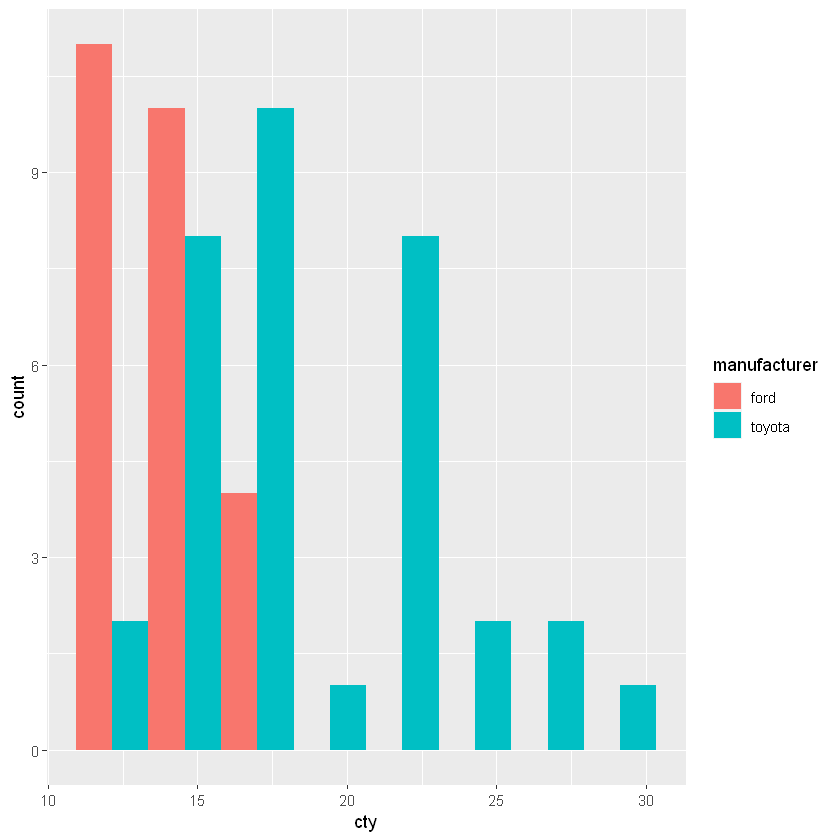

In [5]:
ggplot(data = toyota_and_ford)+
    geom_histogram(aes(x=cty,fill = manufacturer), bins=8, position="dodge")

Question # 2

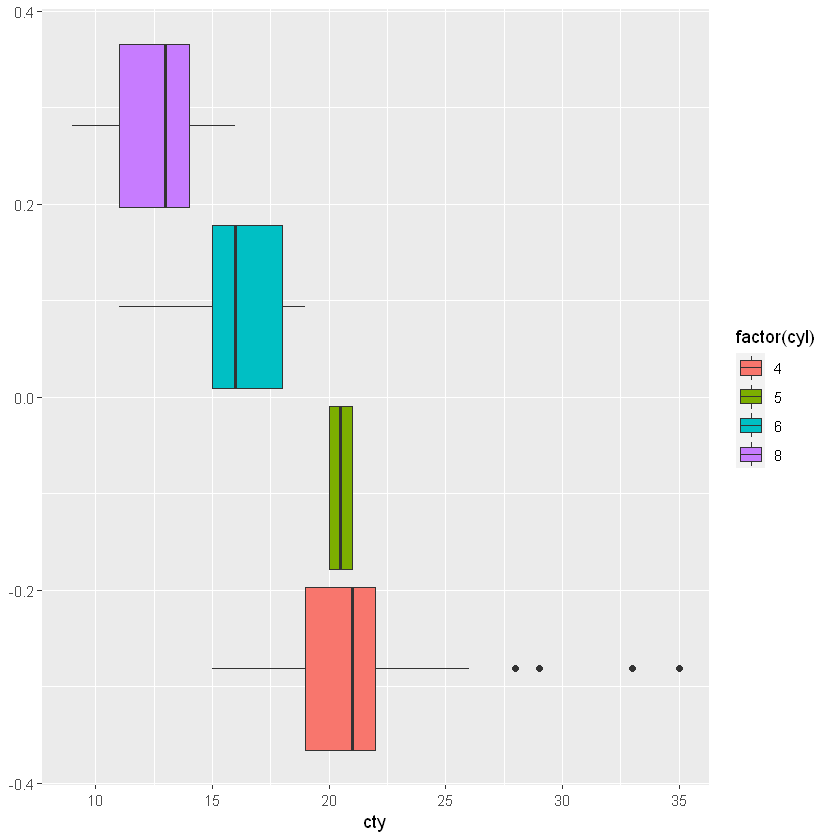

In [6]:
ggplot(data=mpg)+
    geom_boxplot(aes(x=cty, fill = factor(cyl)))

Question # 3

In [7]:
log_norm <- rlnorm(1000)

In [8]:
log_norm <- data.frame(log_norm)
colnames(log_norm) <- "observations"

In [9]:
str(log_norm)

'data.frame':	1000 obs. of  1 variable:
 $ observations: num  0.63 0.917 4.381 1.421 1.962 ...


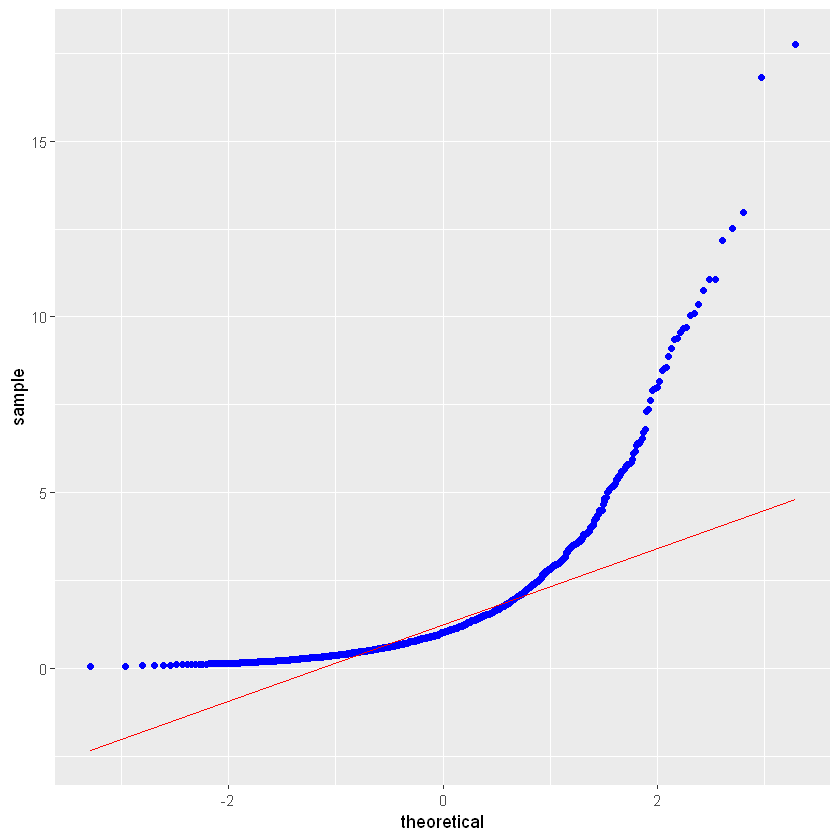

In [10]:
ggplot(log_norm, aes(sample=observations))+
    stat_qq(color="blue")+stat_qq_line(color="red")

Question # 4

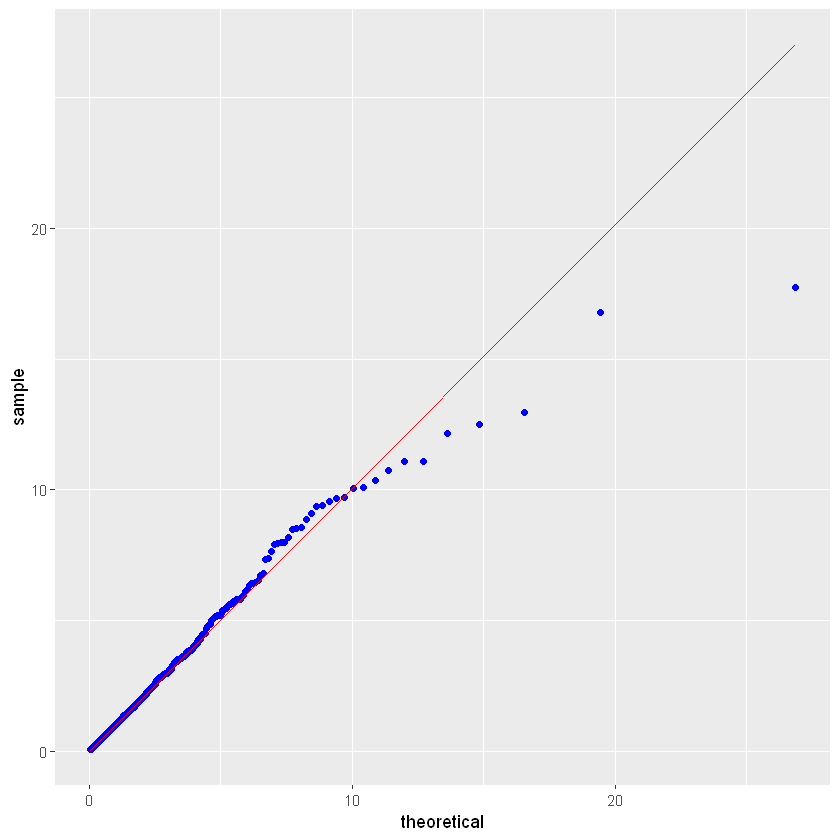

In [11]:
ggplot(log_norm, aes(sample=observations))+
    stat_qq(color="blue", distribution = qlnorm)+stat_qq_line(color="red", distribution = qlnorm)

Project 4
Question # 1

In [12]:
treasury <- read_csv("daily_treasury_yield_curve_rates.csv")


-- Column specification ------------------------------------------------------------------------------------------------
cols(
  Date = col_character(),
  `1_Mo` = col_double(),
  `2_Mo` = col_double(),
  `3_Mo` = col_double(),
  `6_Mo` = col_double(),
  `1_Yr` = col_double(),
  `2_Yr` = col_double(),
  `3_Yr` = col_double(),
  `5_Yr` = col_double(),
  `7_Yr` = col_double(),
  `10_Yr` = col_double(),
  `20_Yr` = col_double(),
  `30_Yr` = col_double()
)




In [13]:
str(treasury)

tibble [251 x 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date : chr [1:251] "1/2/20" "1/3/20" "1/6/20" "1/7/20" ...
 $ 1_Mo : num [1:251] 1.53 1.52 1.54 1.52 1.5 1.53 1.52 1.54 1.53 1.53 ...
 $ 2_Mo : num [1:251] 1.55 1.55 1.54 1.53 1.53 1.55 1.55 1.56 1.56 1.56 ...
 $ 3_Mo : num [1:251] 1.54 1.52 1.56 1.54 1.54 1.54 1.54 1.57 1.57 1.57 ...
 $ 6_Mo : num [1:251] 1.57 1.55 1.56 1.56 1.56 1.56 1.55 1.57 1.57 1.58 ...
 $ 1_Yr : num [1:251] 1.56 1.55 1.54 1.53 1.55 1.54 1.53 1.53 1.53 1.54 ...
 $ 2_Yr : num [1:251] 1.58 1.53 1.54 1.54 1.58 1.58 1.56 1.58 1.58 1.56 ...
 $ 3_Yr : num [1:251] 1.59 1.54 1.56 1.55 1.61 1.59 1.59 1.6 1.59 1.56 ...
 $ 5_Yr : num [1:251] 1.67 1.59 1.61 1.62 1.67 1.65 1.63 1.65 1.63 1.6 ...
 $ 7_Yr : num [1:251] 1.79 1.71 1.72 1.74 1.78 1.77 1.74 1.76 1.74 1.71 ...
 $ 10_Yr: num [1:251] 1.88 1.8 1.81 1.83 1.87 1.85 1.83 1.85 1.82 1.79 ...
 $ 20_Yr: num [1:251] 2.19 2.11 2.13 2.16 2.21 2.17 2.14 2.16 2.12 2.09 ...
 $ 30_Yr: num [1:251] 2.33 2.26 2.28 2.31 2.35 2

In [14]:
head(treasury)

Date,1_Mo,2_Mo,3_Mo,6_Mo,1_Yr,2_Yr,3_Yr,5_Yr,7_Yr,10_Yr,20_Yr,30_Yr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/2/20,1.53,1.55,1.54,1.57,1.56,1.58,1.59,1.67,1.79,1.88,2.19,2.33
1/3/20,1.52,1.55,1.52,1.55,1.55,1.53,1.54,1.59,1.71,1.80,2.11,2.26
1/6/20,1.54,1.54,1.56,1.56,1.54,1.54,1.56,1.61,1.72,1.81,2.13,2.28
1/7/20,1.52,1.53,1.54,1.56,1.53,1.54,1.55,1.62,1.74,1.83,2.16,2.31
1/8/20,1.50,1.53,1.54,1.56,1.55,1.58,1.61,1.67,1.78,1.87,2.21,2.35
1/9/20,1.53,1.55,1.54,1.56,1.54,1.58,1.59,1.65,1.77,1.85,2.17,2.38


Question # 2

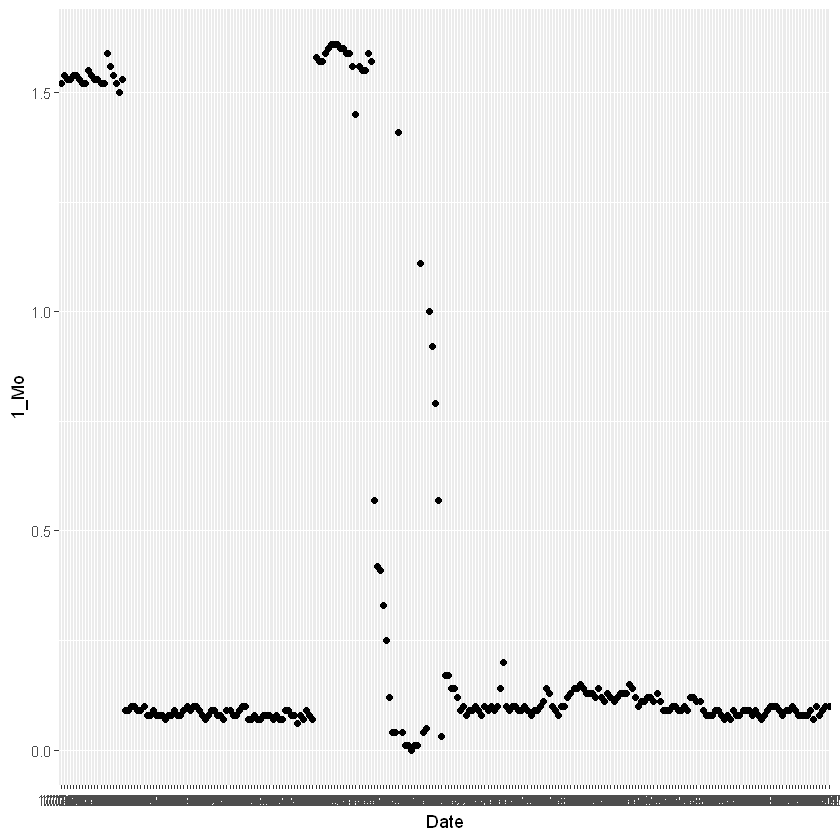

In [15]:
ggplot(data = treasury, aes(x =Date, y = `1_Mo`))+
    geom_point()

The behaviour is based on the dates and the dates are being ordered wrong, therefore we see a big dip out of nowhere. What I think is happening is that the dates are being ordered by the month so, it would be 1, 10, 11, 12, 2, 3: Jan, Oct, Nov, Dec, Feb, Mar. 

Question # 3

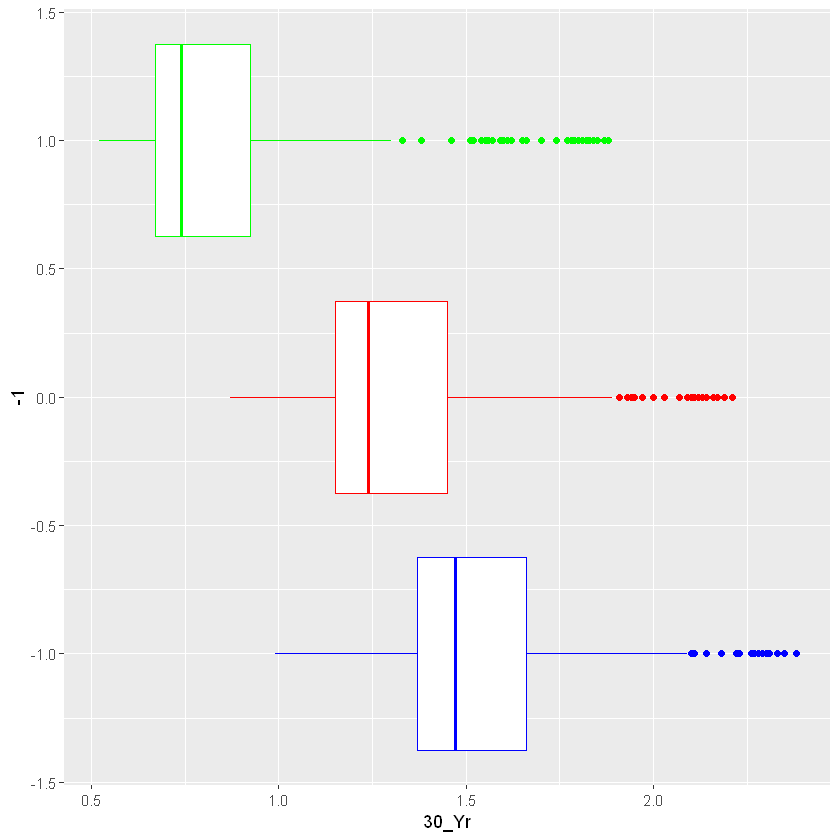

In [16]:
ggplot(data=treasury)+
    geom_boxplot(aes(x=`30_Yr`,y=-1), color = "blue", position = "dodge")+
    geom_boxplot(aes(x=`20_Yr`,y=0), color = "red", position = "dodge")+
    geom_boxplot(aes(x=`10_Yr`,y=1), color = "green", position = "dodge")

Question # 4

In [17]:
summary(treasury$`1_Mo`)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0800  0.1000  0.3527  0.1400  1.6100 

In [18]:
Q1 = .08

In [19]:
Q3 = .14

In [20]:
IQR = Q3 - Q1

In [21]:
lower_Bound = Q1 - 1.5*IQR

In [22]:
upper_Bound = Q3 + 1.5*IQR

In [23]:
one_month <- filter(treasury, 
                    `1_Mo` > lower_Bound & `1_Mo` < upper_Bound)

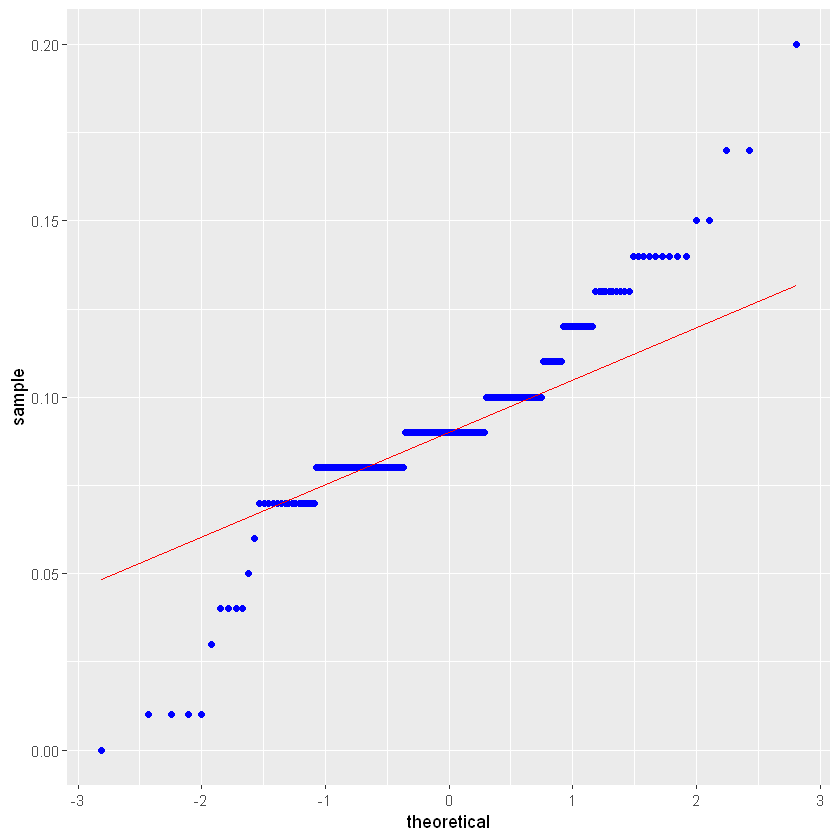

In [25]:
ggplot(one_month, aes(sample=`1_Mo`))+
    stat_qq(color="blue")+stat_qq_line(color="red")

Question # 5

In [26]:
summary(one_month$`1_Mo`)
mean = 0.093

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.080   0.090   0.093   0.100   0.200 

In [27]:
standard_deviation <- sd(one_month$`1_Mo`)

In [29]:
mean
standard_deviation

[1] 0.093

[1] 0.02717892

In [30]:
ninetyfifthpercentile = mean + standard_deviation*(1.645)

In [31]:
ninetyfifthpercentile

[1] 0.1377093

The yield rate (0.1377) that is greater than 95% of the other yield rates without outliers is greater than the yield rates for (around 0.7-8) January 2021. This makes sense because the rate that is greater than 95% of other rates without outliers should be close to the max value without outliers. January's rate are fairly similar to the one month rates without outliers, so there is no surprise that the 95% value is greater than those rates in Jan 2021.

Question # 6

plot of average 30 year return rates in 2020

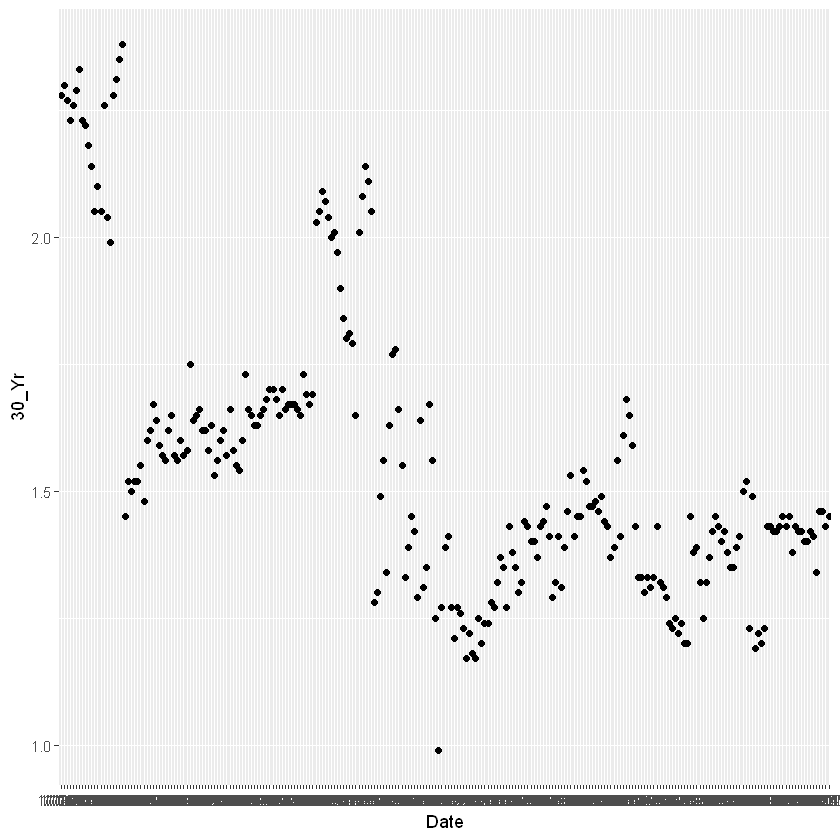

In [34]:
ggplot(treasury, aes(x = Date, y = `30_Yr`)) +
    geom_point()